📝 Zadanie 1: Podstawy DataFrame i wykres liniowy

 **Dane:** Liczba mieszkańców Warszawy i Łodzi w wybranych latach:

 | Rok  | Warszawa  | Łódź      |
 |------|-----------|-----------|
 | 2002 | 1672000   | 789318    |
 | 2011 | 1707000   | 728892    |
 | 2015 | 1740000   | None      |
 | 2022 | 1795000   | 670642    |

**Polecenia:**
1. Utwórz słownik z powyższymi danymi (użyj `None` dla brakujących wartości)
2. Stwórz DataFrame z tego słownika
3. Zapisz DataFrame do pliku `populacja_miast.csv`
4. Wczytaj dane z pliku
5. **Stwórz wykres liniowy** pokazujący zmiany populacji obu miast w czasie
   - Użyj różnych kolorów i markerów dla każdego miasta
    - Dodaj tytuł, opisy osi i legendę
    - Wypróbuj wszystkie 3 metody (matplotlib, pandas, seaborn)

In [1]:
dane_ludnosc = {
    'Rok': [2002, 2011, 2015, 2022],
    'Warszawa': [1672000, 1707000, 1740000, 1795000],
    'Łódź': [789318, 728892, None, 670642]
}
print(dane_ludnosc)

{'Rok': [2002, 2011, 2015, 2022], 'Warszawa': [1672000, 1707000, 1740000, 1795000], 'Łódź': [789318, 728892, None, 670642]}


In [2]:
import pandas as pd

df_ludnosc = pd.DataFrame(dane_ludnosc)
display(df_ludnosc)

,Rok,Warszawa,Łódź
0,2002,1672000,789318.0
1,2011,1707000,728892.0
2,2015,1740000,NaN
3,2022,1795000,670642.0


In [3]:
df_ludnosc.to_csv('populacja_miast.csv', index=False)

In [8]:
df_loaded = pd.read_csv('populacja_miast.csv')
print("\n✓ Dane wczytane z pliku:")
print(df_loaded.head())


✓ Dane wczytane z pliku:
    Rok  Warszawa      Łódź
0  2002   1672000  789318.0
1  2011   1707000  728892.0
2  2015   1740000       NaN
3  2022   1795000  670642.0


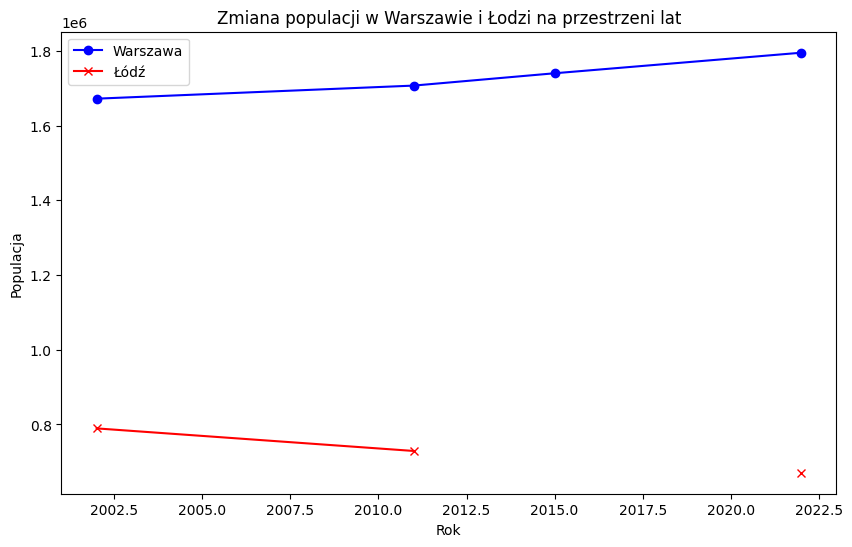

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df_ludnosc['Rok'], df_ludnosc['Warszawa'], marker='o', color='blue', label='Warszawa')
ax.plot(df_ludnosc['Rok'], df_ludnosc['Łódź'], marker='x', color='red', label='Łódź')

ax.set_title('Zmiana populacji w Warszawie i Łodzi na przestrzeni lat')
ax.set_xlabel('Rok')
ax.set_ylabel('Populacja')

ax.legend()

plt.show()

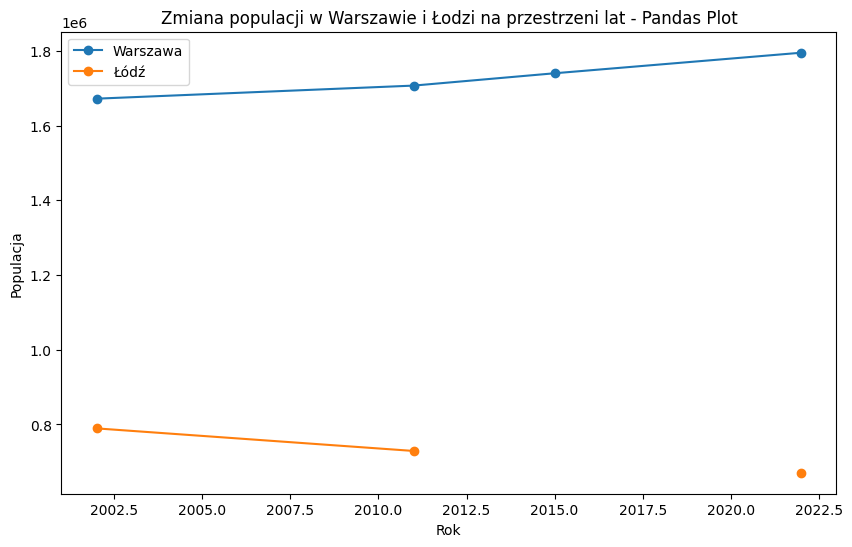

In [14]:
ax = df_ludnosc.plot(x='Rok', y=['Warszawa', 'Łódź'], kind='line', marker='o', figsize=(10, 6))
ax.set_title('Zmiana populacji w Warszawie i Łodzi na przestrzeni lat - Pandas Plot')
ax.set_xlabel('Rok')
ax.set_ylabel('Populacja')
ax.legend(['Warszawa', 'Łódź'])
plt.show()

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

df_melted = pd.melt(df_ludnosc, id_vars=['Rok'], value_vars=['Warszawa', 'Łódź'], var_name='Miasto', value_name='Populacja')
display(df_melted)

,Rok,Miasto,Populacja
0,2002,Warszawa,1672000.0
1,2011,Warszawa,1707000.0
2,2015,Warszawa,1740000.0
3,2022,Warszawa,1795000.0
4,2002,Łódź,789318.0
5,2011,Łódź,728892.0
6,2015,Łódź,NaN
7,2022,Łódź,670642.0


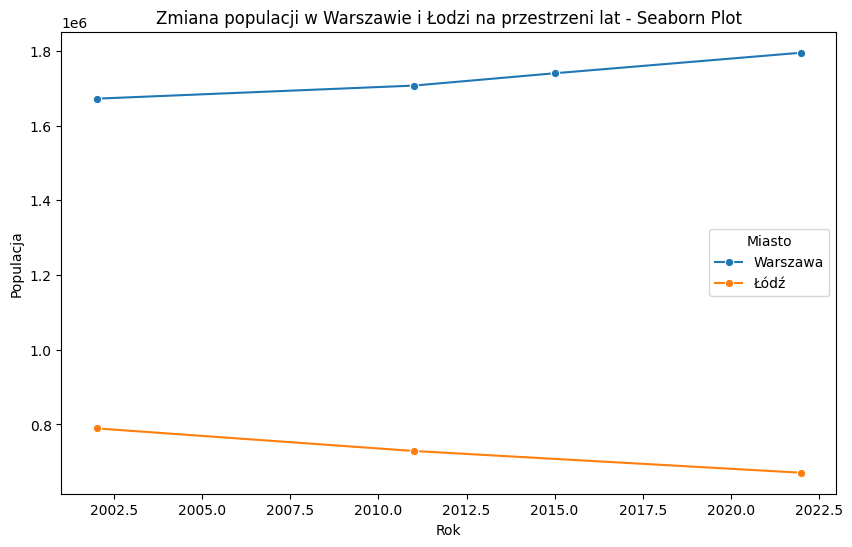

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='Rok', y='Populacja', hue='Miasto', marker='o')

plt.title('Zmiana populacji w Warszawie i Łodzi na przestrzeni lat - Seaborn Plot')
plt.xlabel('Rok')
plt.ylabel('Populacja')
plt.legend(title='Miasto')
plt.show()

## 📝 Zadanie 2: Wykres punktowy (Scatter)
#
**Polecenia:**
1. Wygeneruj 100 losowych punktów przedstawiających:
    - `godziny_nauki`: losowe liczby od 0 do 10
    - `ocena`: oblicz jako `50 + godziny_nauki * 5 + szum_losowy`
      (gdzie szum to losowe liczby od -10 do 10)
2. Stwórz DataFrame z tymi danymi
3. **Narysuj scatter plot** pokazujący zależność między godzinami nauki a oceną
4. Dodaj linię trendu używając seaborn
5. Dodaj odpowiednie opisy i tytuł

Podpowiedź: użyj np.random.uniform() lub np.random.randint(

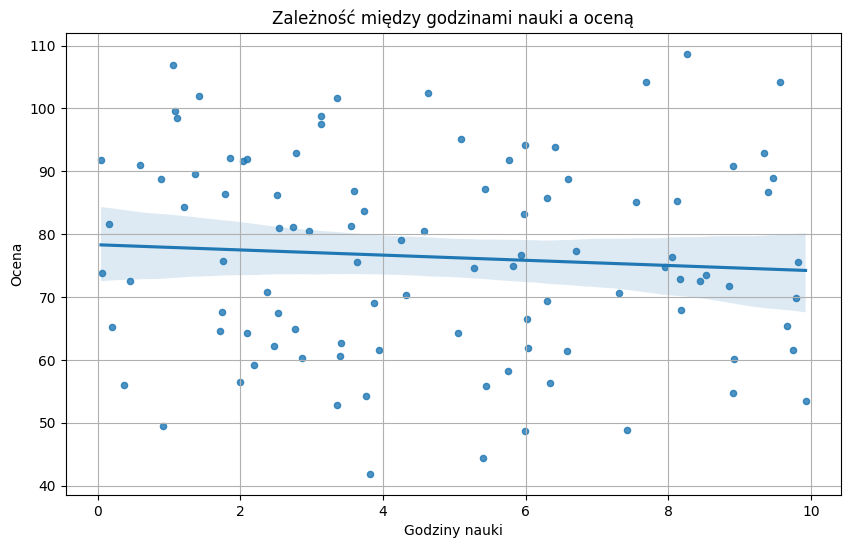

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(100)
scatter_data = pd.DataFrame({
    'godziny_nauki': np.random.uniform(0, 10, 100),
    'ocena': 50 + np.random.uniform(0, 10, 100) * 5 + np.random.uniform(-10, 10, 100)
})

plt.figure(figsize=(10, 6))
sns.regplot(data=scatter_data, x='godziny_nauki', y='ocena', scatter_kws={'s': 20})

plt.title('Zależność między godzinami nauki a oceną')
plt.xlabel('Godziny nauki')
plt.ylabel('Ocena')
plt.grid(True)
plt.show()

ZADANIE 3

📝 Zadanie 3: Wykres słupkowy (Bar)

**Dane:** Przeciętne miesięczne wynagrodzenie w wybranych miastach Polski (2023):

 | Miasto    | Wynagrodzenie [PLN] |
 |-----------|---------------------|
 | Warszawa  | 8500                |
 | Kraków    | 7200                |
 | Wrocław   | 7400                |
 | Poznań    | 7100                |
 | Gdańsk    | 6900                |
 | Łódź      | 6300                |

**Polecenia:**
1. Utwórz DataFrame z powyższymi danymi
2. **Stwórz wykres słupkowy poziomy** (barh) pokazujący wynagrodzenia
3. Posortuj miasta od najwyższego do najniższego wynagrodzenia
4. Użyj gradientu kolorów (np. od czerwonego do zielonego)
5. Dodaj wartości na słupkach

In [25]:
dane_wynagrodzenie = {
    'Miasto': ['Warszawa', 'Kraków', 'Wrocław', 'Poznań', 'Gdańsk', 'Łódź'],
    'Wynagrodzenie [PLN]': [8500, 7200, 7400, 7100, 6900, 6300]
}
print(dane_wynagrodzenie)

{'Miasto': ['Warszawa', 'Kraków', 'Wrocław', 'Poznań', 'Gdańsk', 'Łódź'], 'Wynagrodzenie [PLN]': [8500, 7200, 7400, 7100, 6900, 6300]}


/tmp/ipython-input-4231773395.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_wynagrodzenie_sorted, y='Miasto', x='Wynagrodzenie [PLN]', palette='viridis') # Using seaborn for gradient


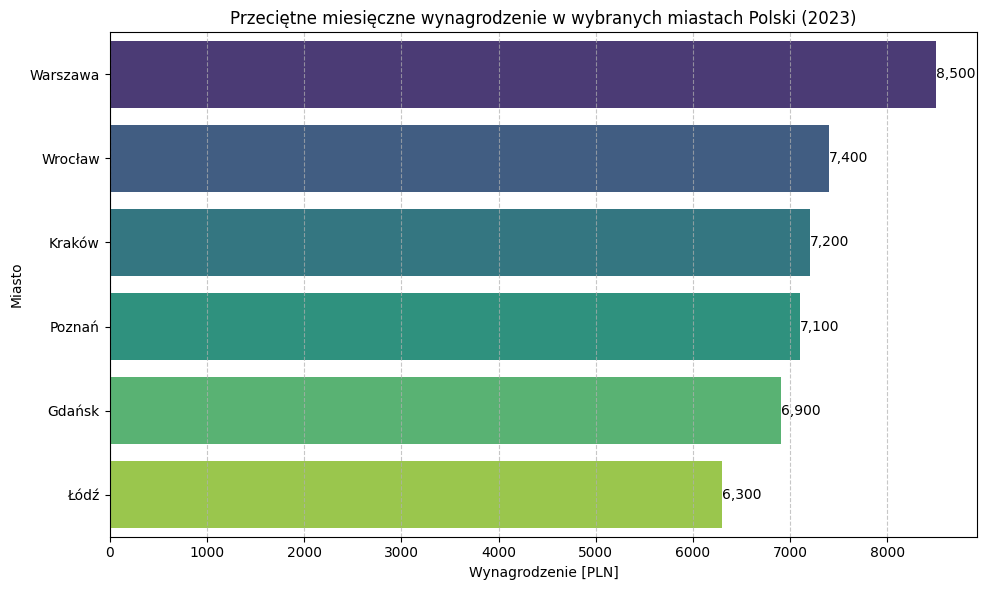

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for potential gradient coloring

df_wynagrodzenie = pd.DataFrame(dane_wynagrodzenie)

# Sort data for plotting
df_wynagrodzenie_sorted = df_wynagrodzenie.sort_values('Wynagrodzenie [PLN]', ascending=False)

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_wynagrodzenie_sorted, y='Miasto', x='Wynagrodzenie [PLN]', palette='viridis') # Using seaborn for gradient

plt.title('Przeciętne miesięczne wynagrodzenie w wybranych miastach Polski (2023)')
plt.xlabel('Wynagrodzenie [PLN]')
plt.ylabel('Miasto')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add values on bars
for index, value in enumerate(df_wynagrodzenie_sorted['Wynagrodzenie [PLN]']):
    plt.text(value, index, f'{value:,.0f}', va='center') # Add text labels

plt.tight_layout()
plt.show()